In [64]:
#dataset has 3810 grains upon 7 morphological features we have to create ML model
#1.area

#2.perimeter

#3.major axis length

#4.minor  axis length

#5.eccentricity

#6.convex area

#7.extent

#8.class-commmeo & osmancik

#data modeling 1.data set loading 2.eda & pre-processing 3.ml model 4.compute evaluation matrix 5.accuracy

#Ensemble uses 3 vtechniques bagging,boosting and stacking

#Justification of model using 2 algorithms Decision tree and Random forest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  StratifiedKFold

### Data set loading

In [2]:
import os
for dirname, _, filenames in os.walk('Rice_Cammeo_Osmancik.xlsx'):
    for filename in filenames:

        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_excel('Rice_Cammeo_Osmancik.xlsx')
df = data.copy()

### EDA and pre-processing

In [4]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [5]:
df.tail()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik
3809,11434,404.709991,161.079269,90.868195,0.825692,11591,0.802949,Osmancik


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


In [7]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [8]:
df.nunique()

Area                 2828
Perimeter            3738
Major_Axis_Length    3808
Minor_Axis_Length    3804
Eccentricity         3803
Convex_Area          2857
Extent               3804
Class                   2
dtype: int64

In [9]:
df.corr(numeric_only=True)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


In [10]:
#Return DataFrame with duplicate rows removed
df.drop_duplicates()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [11]:
classes = df["Class"].value_counts()
classes_df = pd.DataFrame(classes)
classes_df = classes.reset_index(level = 0)
classes_df

,Class,count
0,Osmancik,2180
1,Cammeo,1630


### Seaborn Countplot

<Axes: xlabel='Class', ylabel='count'>

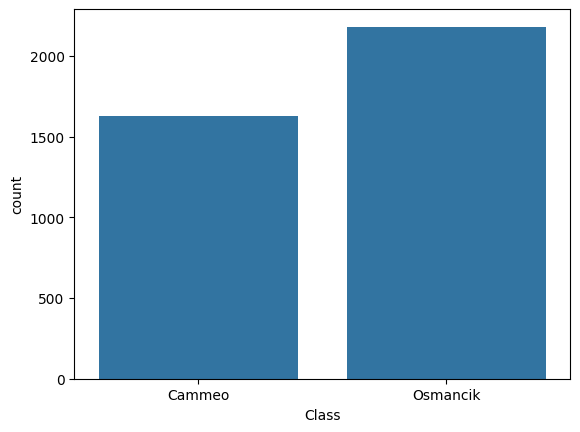

In [12]:
sns.countplot(x="Class", data=df)

In [13]:
encoder = LabelEncoder()
df["Class"] = encoder.fit_transform(df['Class'])

In [14]:
df.shape
df[3804:-1]

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3804,12501,451.799011,192.738800,83.195061,0.902043,12687,0.718820,1
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,1
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,1
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,1
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,1


In [15]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934,0.572178
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239,0.494828
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413,0.000000
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862,0.000000
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361,1.000000
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562,1.000000
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050,1.000000


### Splitting of dataset train and test

In [16]:
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 123)

In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

### ML model
Random forest is meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Trees in the forest use the best split strategy, i.e. equivalent to passing

In [18]:
#gridserach value
grid = {'n_estimators':np.arange(100,1000,100),
        'criterion':['gini','entropy'] 
       }

rf = RandomForestClassifier(random_state = 123)
#Exhaustive search over specified parameter values for an estimator. It implements a "fit" and a "score" method. I
rf_cv = GridSearchCV(rf,grid,cv=5)
rf_cv.fit(X_train_scaled,y_train)
print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(X_test_scaled,y_test))

KeyboardInterrupt: 

### Confusion matrix

c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


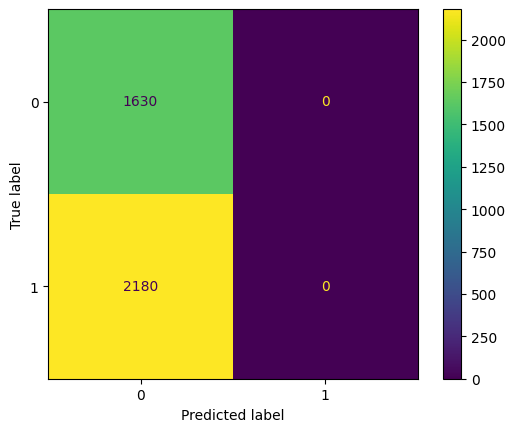

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_cv,X,y)

### Accuracy of model

In [87]:
p_pred = rf_cv.predict(X_test_scaled)
print(classification_report(y_test, p_pred))


              precision    recall  f1-score   support

           0       0.93      0.89      0.91       501
           1       0.92      0.94      0.93       642

    accuracy                           0.92      1143
   macro avg       0.92      0.92      0.92      1143
weighted avg       0.92      0.92      0.92      1143



In [120]:
seed = 20

In [121]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, stratify = y, random_state = seed)

In [123]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandart = scaler.transform(X_train)
X_testStandart = scaler.transform(X_test)

In [132]:

clf = DecisionTreeClassifier(random_state = seed)

path = clf.cost_complexity_pruning_path(X_train, y_train)
alphas = path["ccp_alphas"]
params = {"ccp_alpha": alphas,
          "max_features": np.arange(1,10),
          "max_depth": [3]}          

dt_clf_grid = RandomizedSearchCV(estimator = clf, param_distributions = params,cv = StratifiedKFold(n_splits = 10, shuffle = True,random_state = seed),verbose = 2, scoring = "accuracy",n_jobs = -1)

dt_model = dt_clf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [133]:
dt_best = pd.DataFrame.from_dict(dt_model.best_params_, orient = "index").rename(columns = {0: "Best"})
dt_best

,Best
max_features,2.000000
max_depth,3.000000
ccp_alpha,0.000951


In [134]:
dt_clf = DecisionTreeClassifier(max_features = int(dt_best.iloc[0,0]),
                                max_depth = int(dt_best.iloc[1,0]),
                                ccp_alpha = dt_best.iloc[2,0],
                                random_state = seed)
# Fit the model
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0009508615344650546, max_depth=3,
                       max_features=2, random_state=20)

In [135]:
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Model Accuracy:", dt_acc)
dt_acc_tr = dt_clf.score(X_train, y_train)
print("Decision Tree Training Accuracy:", dt_acc_tr)

Decision Tree Model Accuracy: 0.9245406824146981
Decision Tree Training Accuracy: 0.931758530183727
